In [4]:
# WARNING: Use Julia 1.6 Kernel
include("./src/HomotopyOpt.jl")
using HomotopyContinuation

# Sextic Curve Optimization

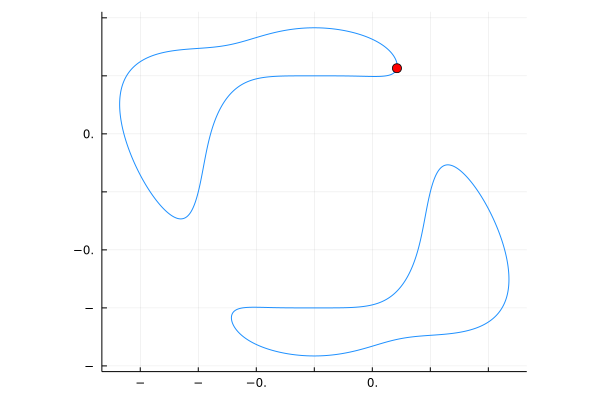

LoadError: SystemError: opening file "C:\\Users\\matth\\AppData\\Local\\Temp\\jl_FeuEIXuCzz.png": No such file or directory

In [5]:
@var x y
V = HomotopyOpt.ConstraintVariety([x,y], [(x^4 + y^4 - 1) * (x^2 + y^2 - 2) + x^5 * y], 2, 1, 50);
p0 = V.samples[1]
objective(z) = (z[1]-1)^2+(z[2]-1)^2
resultminimum = HomotopyOpt.findminima(p0, 1e-3, V, objective; maxlocalsteps=1,maxseconds=100, whichstep="EDStep", initialstepsize=0.1);
HomotopyOpt.watch(resultminimum)

Noteworthy difference between `EDStep` and `gaussnewtonstep`: `EDStep` stays on the same connected component, `gaussnewtonstep` does not necessarily do that. `EDSteps` takes fewer local steps; however, it takes a lot of steps in the backtracking line search, which `gaussnewtonstep` simply does not (why?)

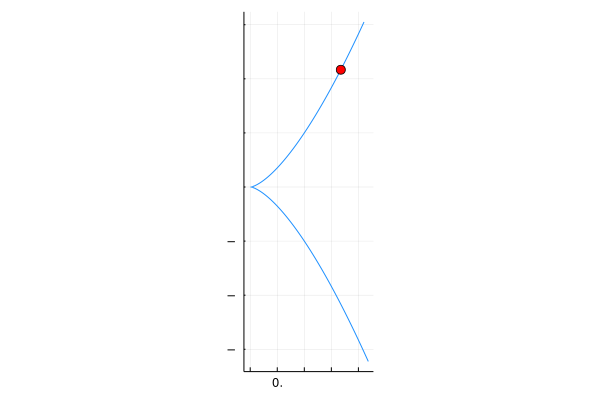

LoadError: SystemError: opening file "C:\\Users\\matth\\AppData\\Local\\Temp\\jl_mA8wZgI3ei.png": No such file or directory

In [6]:
@var x y
V = HomotopyOpt.ConstraintVariety([x,y], [y^2-x^3], 2, 1, 150);
p0 = [1.,1]
objective(z) = (z[1]-2)^2+(z[2]-2)^2
resultminimum = HomotopyOpt.findminima(p0, 1e-3, V, objective; maxlocalsteps=1,maxseconds=100, whichstep="EDStep", initialstepsize=0.1);
HomotopyOpt.watch(resultminimum)

Conclusion: we need to do something about singularities. Maybe we should assume that we start with a regular point, compute the dimension from there and check for drops in dimension? gaussnewtonstep seems to have more problems here. To see that, try literally any other objective function whose optimum is not on the same 'arm' of the cuspidal cubic. 

Tracking 3 paths... 100%|███████████████████████████████| Time: 0:00:02
  # paths tracked:                  3
  # non-singular solutions (real):  3 (1)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         3 (1)


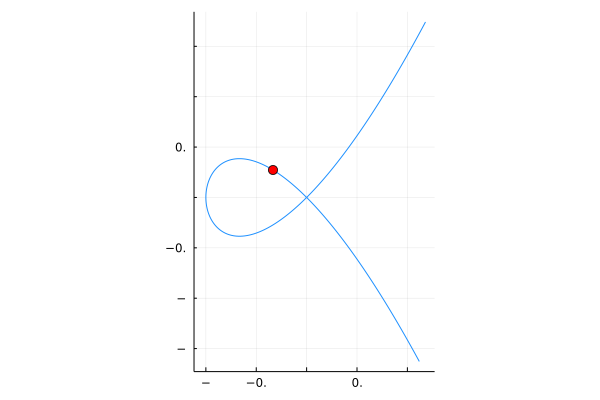

LoadError: SystemError: opening file "C:\\Users\\matth\\AppData\\Local\\Temp\\jl_cjvzbP4VA0.png": No such file or directory

In [7]:
@var x y
V = HomotopyOpt.ConstraintVariety([x,y], [y^2-x^2*(x+1)], 2, 1, 100);
p0 = [-0.5,sqrt(0.5^3)]
objective(z) = (z[1]+0.5)^2+(z[2])^2
resultminimum = HomotopyOpt.findminima(p0, 1e-3, V, objective; maxlocalsteps=1,maxseconds=100, whichstep="EDStep", initialstepsize=0.1);
HomotopyOpt.watch(resultminimum)

Maybe the notion of an optimum that the gradient is supposed to be perpendicular to the constraint variety is only useful in regular points? In singularities, this notion becomes degenerate: The nodal cubic has a trivial normal space in (0,0), so every gradient is perpendicular there. This implies that we need some way to recognize and skip singularities.

In [ ]:
@var x y z
V = HomotopyOpt.ConstraintVariety([x,y,z],[z^2-y^2*(y+1)-x^2*(x+1)], 3, 2, 300);
p0 = V.samples[1]
objective(z) = (z[1]+0.5)^2+(z[2]+0.5)^2+(z[3])^2
resultminimum = HomotopyOpt.findminima(p0, 1e-3, V, objective; maxlocalsteps=1, maxseconds=200, whichstep="EDStep", initialstepsize=0.1);
HomotopyOpt.watch(resultminimum; samples = (50,50,50))

In [ ]:
@var x y z
V = HomotopyOpt.ConstraintVariety([x,y,z],[z-x^2,x-y^2], 3, 1, 300);
p0 = V.samples[1]
objective(z) = (z[1]-1)^2+(z[2]-1)^2+(z[3]-1)^2
resultminimum = HomotopyOpt.findminima(p0, 1e-3, V, objective; maxlocalsteps=1,maxseconds=200, whichstep="EDStep", initialstepsize=0.1);
HomotopyOpt.watch(resultminimum; WGLMode=true)

Tracking 4 paths... 100%|███████████████████████████████| Time: 0:00:02
  # paths tracked:                  4
  # non-singular solutions (real):  4 (2)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         4 (2)
